In [1]:
%matplotlib inline

In [316]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
# pylab.rcParams['figure.figsize'] = (8, 10.)
# sns.set(font='sans-serif')
sns.set_style('whitegrid')

In [314]:
# messing with cols when setting index
df = pd.read_table("data/fastq_multx_demultiplexing_counts.tsv", index_col=False, usecols=[0,1], header=0)
df = df.set_index(['Id'])
df.tail(4)

,Count
Id,
natalie-6Apos,1
natalie-2EN,2
unmatched,5783327
total,6223383


In [315]:
tdf = df.drop(df.loc[['unmatched','total']].index)
tdf.tail(2)

,Count
Id,
natalie-6Apos,1
natalie-2EN,2


In [262]:
v = tdf['Count'].values

In [267]:
def Lc(x):
    """Computes the ordinary and generalized Lorenz curve of a list.
    
     In R:
     > library(ineq)
     > t <- c(1,2,6,7,8)
     > lc <- Lc(t)
     > lc$p
     [1] 0.0 0.2 0.4 0.6 0.8 1.0
     > lc$L
     [1] 0.00000000 0.04166667 0.12500000 0.37500000 0.66666667 1.00000000

     Args:
         x (list): list or array of positive numbers
    
     Returns:
         tuple: list of percentages, list with values of the ordinary Lorenze curve

    >>> import numpy as np
    >>> t = [1,2,np.nan,7,8]
    >>> p, L, Lg = Lc(t)
    >>> len(p) == len(L) == Len(Lg)
    True
    >>> p[1:4]
    array([ 0.25,  0.5 ,  0.75])
    >>> L[1:4] # doctest: +ELLIPSIS
    array([ 0.055...,  0.166...,  0.555...])
    >>> Lg[1:4]
    array([ 0.25,  0.75,  2.5 ])
    >>> t = [1,2,np.nan,7,-8]
    >>> Lc(t)
    Traceback (most recent call last)
     ...
    ValueError: x contained negative number
    """
    assert len(x) > 0, "x is empty"
    a = np.array(x, dtype=float)
    a = a[np.isfinite(a)]
    if a.min() < 0:
        raise ValueError("x contained negative number")
    a.sort(kind='mergesort')
    a_len = len(a)
    p = np.arange(1, len(a) + 1) / len(a)
    p = np.append([0], p)
    L = a.cumsum() / a.sum()
    L = np.append([0], L)
    Lg = L * np.mean(a)
    return p, L, Lg

In [264]:
def Gini(x, corr=False):
    """Calculates Gini coefficient, the measure of inequality among values
    of a frequency distribution. A Gini coefficient of zero expresses
    perfect equality.

    Port from ineq package in R.
    
    In R:
    > library(ineq)
    > t <- c(1,2,6,7,8)
    > Gini(t)
    [1] 0.3166667
    > Gini(t, corr=TRUE)
    [1] 0.3958333

    Args:
        x (list): list or array of numbers
        corr (Optional[bool]): finite sample correction

    Returns:
        float
    
    >>> import numpy as np
    >>> t = [1,2,6,7,8]
    >>> Gini(t) # doctest: +ELLIPSIS
    0.3166...
    >>> Gini(t, corr=True)
    0.3958...
    >>> Gini([])
    Traceback (most recent call last):
     ...
    AssertionError: x is empty
    >>> t = [1,2,6,7,"A"]
    >>> Gini(t)
    Traceback (most recent call last):
     ...
    ValueError: could not convert...
    """
    x = np.array(x, dtype=float)
    n = len(x)
    assert n > 0, "x is empty"
    x.sort(kind='mergesort')
    G = sum(np.arange(1, n + 1) * x)
    G = 2 * G / sum(x) - (n + 1)
    if corr:
        return G / (n - 1)
    else:
        return G / n

0.846886978861


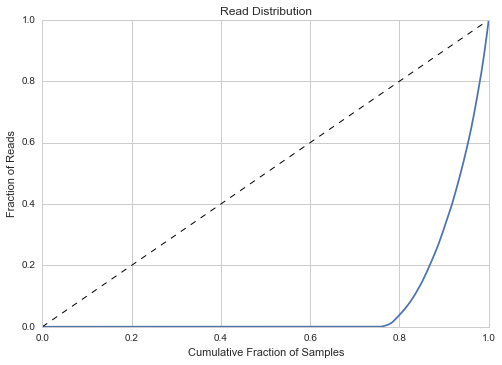

In [320]:
p, L, _ = Lc(v)
G = Gini(v)
plt.plot(p, L)
plt.plot([0., max(L)], color='k', linewidth=1, linestyle='dashed')
plt.xlabel("Cumulative Fraction of Samples")
plt.ylabel("Fraction of Reads")
plt.title("Read Distribution")
print(G)